# 相关性（Correlation）

相关性指的是变量之间的相互关系或关联性。在数据挖掘中，揭示变量间的相关性是非常有意义的。例如，广告投放量的增加可能会引起特定商品销量的增加，某个电商平台的平均消费水平与消费者的特定因素的关联关系。一般情况下，相关性分析是理解变量之间的关系并建立模型的基础工作。

简单的说，

- 相关性可以帮助根据给定变量预测目标变量，

- 相关性可能意味着因果关系的存在，

- 相关性是基本统计量，是很多建模方法的基础。

下文主要展开介绍：

- 皮尔逊相关系数(Pearson Correlation Coefficient)
- 斯皮尔曼相关系数(Spearman's correlation Coefficient)
- 肯德尔相关系数(Kendall's Tau Coefficient)。

## 协方差(covariance)

首先，先了解下协方差/共变数(covariance)。协方差是衡量两个随机变量$X$和$Y$。

$$Cov(X,Y)=E[(X-E[X])(Y-E[Y])]=\frac{\sum_{i=1}^n(X_i-\overline X)(Y_i-\overline Y)}{n-1}$$

从公式中可以看出，每个变量与其均值相减，<font color = 'red'>这些一一对应的中心化数值的乘积可以用来衡量一个随机变量的增加是不是与另一个随机变量的增加相关</font>，最后上述乘积的期望即为两个变量相关性的总和。直观的，中心化数值的乘积可以认为是每个样本点到均值的距离构成的矩形的面积（两个距离分别表示矩形的两条边）。

如果两个变量朝同一个方向变化，则连接点$(X_i, Y_i)$和均值的$(\overline X, \overline Y)$矩形应该有更大的正值向量，也即更大的正值乘积。如果两个变量往不同的方向变化，则矩形的对角向量则是更大的负值，也即更大的负值乘积。如果两个变量不相关，向量平均上将会抵消，总体的对角向量数值量级接近0.

<font color = 'red'>协方差的问题是保留了变量$X$和$Y$的数值量纲，因此取值范围随着两个变量的数值量纲变化，使得协方差无法对比不同组的变量的相关性的差别</font>。例如，对于$Cov(X,Y) = 5.2$, $Cov(Z,Q)=3.6$，可以看出$X$和$Y$，$Z$和$Q$是正相关的，但是如果不参考两组变量的均值和分布，仅根据协方差，就无法判断$X$和$Y$的相关性与$Z$和$Q$的相关性孰强孰弱。这种情况下，根据变量的一些统计特征计算得到标准化的相关系数，能够获取直观且量纲一致的相关性解释，就显得非常有用。

## 皮尔逊相关系数(Pearson Correlation Coefficient)

**皮尔逊相关系数**是使用最广泛的相关性度量方法，可以衡量连续变量的线性相关性。换言之，<font color = 'red'>皮尔逊相关系数描述的是两个变量间的关系能够用**直线**表示的程度</font>。值得一提的是，尽管有很多相关性的衡量方法，但由Karl Pearson在120年前提出的皮尔逊相关系数依然有着广泛的使用。

接下来，介绍皮尔逊相关性($\rho$)的计算方法和直观解释。最初的皮尔逊相关系数计算公式根据变量和变量的均值计算得到。

$$\rho_{X,Y}=\frac{\sum(X_i-\overline X)(Y_i-\overline Y)}{\sqrt{\sum(X_i-\overline X)^2\sum(Y_i-\overline Y)^2}}$$

观察值减去均值，然后使用标准差做数值的标准化变换。

另外一种计算方法是，使用期望$\mu_X,\mu_Y$和标准差$\delta_X,\delta_Y$计算:

$$\rho_{X,Y}=\frac{E[(X_i-\mu_X)(Y_i-\mu_Y)]}{\delta_X\delta_Y}$$

上述两个公式本质上是一致的。**分母中的标准差的乘积保证了相关系数的值域为$[-1,1]$**，使得相关性的解释变得直观和容易。

下面三个图展示了三个皮尔逊相关系数的示例。$\rho$越接近1，两个变量的正相关关系越强。反之，$\rho$越接近-1，两个变量的负相关关系越强。如果两个变量相互独立，则$\rho$越接近0。另外，即使皮尔逊相关系数很低，变量间也可能存在很强的相关性。

### stats库计算pearsonr

In [1]:
! pip install sklearn

In [10]:
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = [0, 1, 2, 3, 4, 5]
y_1 = [0, 2, 4, 5, 9, 10]
y_2 = list(-1*np.array(y_1))
y_3 = list(np.power(np.array(x)-2.5,2))  #numpy.power()用于数组元素求n次方
#print(y_1,y_2,y_3)

corr_1, p_value_1 = pearsonr(x, y_1)
corr_2, p_value_2 = pearsonr(x, y_2)
corr_3, p_value_3 = pearsonr(x, y_3)

print(y_1, corr_1, p_value_1)
print(y_2, corr_2, p_value_2)
print(y_3, corr_3, p_value_3)

[0, 2, 4, 5, 9, 10] 0.9871352947927471 0.0002471864016312273
[0, -2, -4, -5, -9, -10] -0.9871352947927471 0.0002471864016312273
[6.25, 2.25, 0.25, 0.25, 2.25, 6.25] 0.0 1.0


In [7]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, o

In [4]:
# 实例化
regressor = LinearRegression()

# reshape等于-1的话，那么Numpy会根据剩下的维度计算出数组的另外一个shape属性值
# training the algorithm
regressor.fit(np.array(x).reshape(-1, 1), np.array(y_1).reshape(-1, 1))
# To retrieve the intercept:（回归方程系数与常量）
intercept_1 = regressor.intercept_
coef_1 = regressor.coef_

# training the algorithm
regressor.fit(np.array(x).reshape(-1, 1), np.array(y_2).reshape(-1, 1))
# To retrieve the intercept:
intercept_2 = regressor.intercept_
coef_2 = regressor.coef_

# training the algorithm
regressor.fit(np.array(x).reshape(-1, 1), np.array(y_3).reshape(-1, 1))
# To retrieve the intercept:
intercept_3 = regressor.intercept_
coef_3 = regressor.coef_

fitted_1 = coef_1*np.array(x)+intercept_1
fitted_2 = coef_2*np.array(x)+intercept_2
fitted_3 = coef_3*np.array(x)+intercept_3

[0, 2, 4, 5, 9, 10] 0.9871352947927471 0.0002471864016312273
[0, -2, -4, -5, -9, -10] -0.9871352947927471 0.0002471864016312273
[6.25, 2.25, 0.25, 0.25, 2.25, 6.25] 0.0 1.0


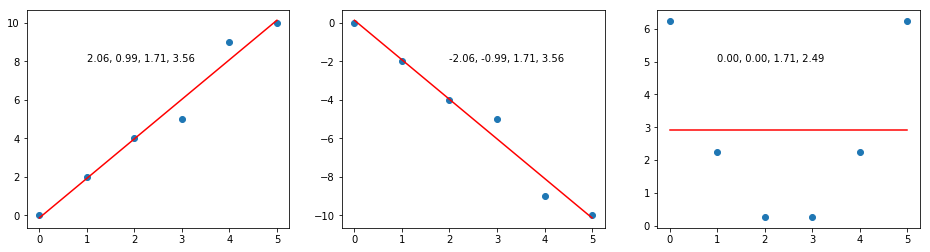

In [14]:
# subplots()同一张图上分子图
fig,axes = plt.subplots(1,3,figsize=[16,4])
axes[0].scatter(x,y_1)
axes[0].plot(x,fitted_1.flat,'r-')
axes[0].text(1,8,'{:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(coef_1[0][0],corr_1,np.std(x),np.std(y_1))) #回归方程系数、皮尔逊相关系数、x标准差、y标准差

axes[1].scatter(x,y_2)
axes[1].plot(x,fitted_2.flat,'r-')
axes[1].text(2,-2,'{:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(coef_2[0][0],corr_2,np.std(x),np.std(y_2)))
axes[2].scatter(x,y_3)

axes[2].plot(x,fitted_3.flat,'r-')
axes[2].text(1,5,'{:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(coef_3[0][0],corr_3,np.std(x),np.std(y_3)))
plt.show()

在上面的三个示例中，红色的直线是通过线性模型拟合得到的最佳拟合结果（使得所有点到拟合直线的距离的和最小），实际上皮尔逊相关性与拟合直线的斜率有明确的联系，$$\rho = b\frac{s_x}{s_y}$$
这里$b$指的是拟合直线的斜率，$s_x$和$s_y$指的是$X$和$Y$的标准差。换言之，相关性反映的是变量间变化性的多少和联系。皮尔逊相关性与拟合直线斜率的关系清楚地表明：

- 皮尔逊相关性只能表示线性关系。
- 相关性在预测模型构建中有着重要的作用。

需要指出的是，我们并没有对于$X$和$Y$的分布给出任何假设。唯一的限定是皮尔逊相关性假设两个变量存在线性关系。**皮尔逊相关性依赖于变量的均值和标准差，这可能导致其对可能存在的异常值非常敏感。**

另外一种解释皮尔逊相关性的方法是**决定系数$R^2$**。因为皮尔逊相关系数是无单位的，它的平方表示$Y$的变化可以由$X$解释的比例。当$\rho=-0.65$时，$R^2=(-0.65)^2*100\% \approx 42\%$，这表示$Y$的42%的变化可以由$X$解释。

## 斯皮尔曼相关系数(Spearman's Correlation Coefficient)

斯皮尔曼相关系数(Spearman's Correlation Coefficient)和斯皮尔曼等级相关系数(Spearman's rank correlation coefficient)指代的同样的概念，可以认为皮尔逊相关系数的一种特殊情况，用于**计算有序变量的相关性**。

**斯皮尔曼相关性不局限于线性关系，相反，它衡量的是变量间的单调变化的关联关系（如单调递增或单调递减），依赖于数值的大小顺序。**皮尔逊相关性依赖于变量的均值和标准差，而斯皮尔曼相关性只关注变量数值的相对顺序。这个特性使得斯皮尔曼相关性适用于连续的和非连续的数据。

斯皮尔曼相关系数的形式上与皮尔逊相关系数类似，不同的是基于原始数值的排序进行计算，

$$\rho_{rank_X,rank_Y}=\frac{cov(rank_X, rank_Y)}{\sigma_{rank_X}\sigma_{rank_Y}}$$

如果所有的数值排序没有并列的情况，还可以通过以下方式计算：

$${\rho_{s}={1-{\frac {6\sum d_{i}^{2}}{N(N^{2}-1)}}}}$$

这里$d_i=rank(X_i)-rank(Y_i)$表示变量对应观测值的排序的差值，$N$是观测值的数量。

### stats库计算spearmanr

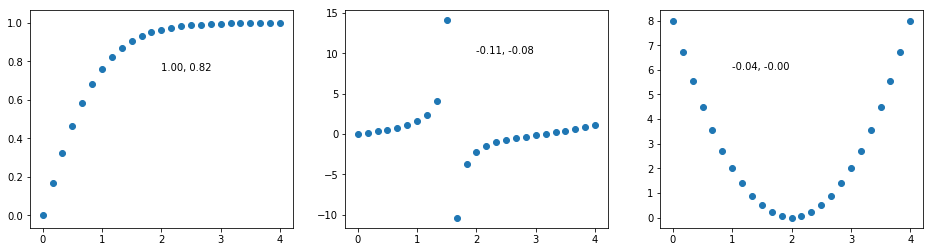

In [4]:
# calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr,pearsonr
# seed random number generator
seed(1)

# prepare data
x = np.linspace(0,4,25) #生成等差数列，开始、结束、数据量
y_1 = np.tanh(x)
y_2 = np.tan(x)
y_3 = 2*np.power((x-2),2)

scoef_1, sp_1 = spearmanr(x, y_1)
scoef_2, sp_2 = spearmanr(x, y_2)
scoef_3, sp_3 = spearmanr(x, y_3)

coef_1, p_1 = pearsonr(x, y_1)
coef_2, p_2 = pearsonr(x, y_2)
coef_3, p_3 = pearsonr(x, y_3)

fig,axes = plt.subplots(1,3,figsize=[16,4])
axes[0].scatter(x,y_1)
axes[0].text(2,0.75,'{:.2f}, {:.2f}'.format(scoef_1,coef_1)) 
axes[1].scatter(x,y_2)
axes[1].text(2,10,'{:.2f}, {:.2f}'.format(scoef_2,coef_2))
axes[2].scatter(x,y_3)
axes[2].text(1,6,'{:.2f}, {:.2f}'.format(scoef_3,coef_3))
plt.show()

使用上述三个例子对比皮尔逊相关性于斯皮尔曼相关性的差别。

在第一幅图中，变量间有明显的非线性的单调递增关系。这种情况下，$X$和$Y$的变量排序的位次将是一一对应的，因此斯皮尔曼相关系数是1。同时由于存在局部的近似线性关系，皮尔逊相关系数为0.82，也表明存在较强的线性关系。

在第二幅图中，由于$X$和$Y$的非单调性、非线性相关性，皮尔逊相关系数为-0.08，斯皮尔曼相关系数为-0.11。

在第三幅图中，$X$和$Y$是典型的以2为中心的二次方程关系，斯皮尔曼相关系数为-0.04，皮尔逊相关系数为0。

上述三个示例表明，相关性分析对于分析数据的内在模式并不是万能的，即使是弱的皮尔逊相关性和斯皮尔逊相关性也不能否定其它关联性的存在。

总体上，通过相关性分析和可视化的技术可以帮助探究变量间关系的隐含模式。

##  肯德尔相关系数(Kendall's Tau Coefficient)

<font color = 'red'>肯德尔相关系数也是基于变量的排序。但是与斯皮尔曼相关系数不同，肯德尔相关性不考虑排序的差异，只关注趋势的一致性。因此，肯德尔相关系数更适用于离散数值。</font>

肯德尔相关系数可以通过如下公式计算，

$${\tau ={\frac {({\text{number of concordant pairs}})-({\text{number of discordant pairs}})}{N(N-1)/2}}}$$

观察一组数据，有5组观察值（实际上，这种小数量的数据样本不足以得到有效可靠的结论，这里只是为了计算的简便性）。



| ? | X | Y |
| --- | --- | --- |
| a | 1 | 7 |
| b | 2 | 5 |
| c | 3 | 1 |
| d | 4 | 6 |
| e | 5 | 9 |

使用$(x_1,y_1)和(x_2,y_2)$表示一组数据对，一致性的情况有：$x_1>x_2,y_1>y_2$和$x_1<x_2,y_1<y_2$，不满足上述情况的数据对为不一致。在上述数据中， (4,6)，(5,9)是一组一致的数据对， (1, 7)，(2, 5)是一组不一致的数据对。

为了计算肯德尔系数$\tau$，统计所有一致的和不一致的数据对的数量，
一致的数据对有6组：

(1,7)和(5,9)

(2,5)和(4,6)

(2,5)和(5,9)

(3,1)和(4,6)

(3,1)和(5,9)

(4,6)和(5,9)

不一致的有4组：

(1,7)和(2,5)

(1,7)和(3,1)

(1,7)和(4,6)

(2,5)和(3,1)

$\tau$的计算公式中的分母是所有样本的组合数$N(N-1)/2$。
对于上述数据示例，可以计算得到

$$\tau=\frac{(6-4)}{5(5-1)/2}=0.2$$

肯德尔相关性适用于离散数据，尤其是排位比数值差别更重要的情况。

##  使用Pandas计算相关性

选择University of California, Irvine(UCI)的一个关于汽车燃油效率的数据作为分析对象，使用pandas计算与汽车燃油效率(vehicle fuel efficiency)相关的一些变量。

从UCI的在线知识库中读取数据。这个数据中使用?表示丢失的数据项。这里我们使用pandas.read_csv()读取数据。

In [15]:
import pandas as pd
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cylinders', 'displacement','horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'name'],
            na_values='?')

In [20]:
mpg_data.isnull().any() #判断那些属性有空值

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [17]:
mpg_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [21]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


观察数据，可以发现horsepower属性项中有6个空值，相比于总量398条数据，可以选择直接丢弃这6条包含空值的数据；也可以选择某种方法替换空值，如使用该属性项的均值替换、前向填充、后向填充等。为了演示填充值的用法，这里使用horsepower的均值做替换。

In [11]:
#mpg_data.dropna(inplace=True)#丢弃包含空值的行

values = {'horsepower':104.47}
mpg_data.fillna(value=values,inplace=True)

In [12]:
mpg_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469397,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


pandas提供了简单的计算数据列之间相关性的方法。在燃油效率(mpg)的实例中，我们检查是不是更重(weight)的机动车趋向于有等低的燃油效率:

In [13]:
mpg_data['mpg'].corr(mpg_data['weight'])

-0.8317409332443351

如上述结果，机动车重量(weight)和燃油效率(mpg)似乎有着很强的负相关关系。对于其它变量间的关系，可以以类似的方法计算得到。另外，还可以指定相关性方法: Spearman, Pearson, 或Kendall。默认情况下是计算Pearson相关系数。下面，我们去掉model_year和origin两个属性项，计算剩余属性变量间的相关性。

In [14]:
# pairwise correlation
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='spearman')

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.821864,-0.855692,-0.843180,-0.874947,0.438677
cylinders,-0.821864,1.000000,0.911876,0.808620,0.873314,-0.474189
displacement,-0.855692,0.911876,1.000000,0.866670,0.945986,-0.496512
horsepower,-0.843180,0.808620,0.866670,1.000000,0.868659,-0.647557
weight,-0.874947,0.873314,0.945986,0.868659,1.000000,-0.404550
acceleration,0.438677,-0.474189,-0.496512,-0.647557,-0.404550,1.000000


pandas也支持表格的强调显示，便于直观地看出相关性的高低。在建模过程中，特别是对于建立回归模型，理解数据中存在的相关性是非常重要的。高度相关的预测因素，如多重共线性，将导致相关系数不可靠。下面是计算皮尔逊相关性的示例，使用有梯度区分的颜色标注相关性结果表格。

In [22]:
# 相关性的高亮表示！
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.0,-0.78,-0.8,-0.78,-0.83,0.42
cylinders,-0.78,1.0,0.95,0.84,0.9,-0.51
displacement,-0.8,0.95,1.0,0.9,0.93,-0.54
horsepower,-0.78,0.84,0.9,1.0,0.86,-0.69
weight,-0.83,0.9,0.93,0.86,1.0,-0.42
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.0


最后，为了可视化地展示mpg与weight,horsepower,acceleration的关系，我们画出这些变量数值的散点图，计算它们的皮尔逊相关系数和斯皮尔曼相关系数。实际的数据分析中，如果数据量过于庞大如百万数量级，可以先使用随机采样的方法选择少量的数据进行观察。

在这个案例中，对于horsepower和weight，因为非线性关系，斯皮尔曼相关系数高于皮尔逊相关系数，而对于acceleration，并不存在显著的线性关系和单调变化一致性，斯皮尔曼相关系数和皮尔逊相关系数比较接近。

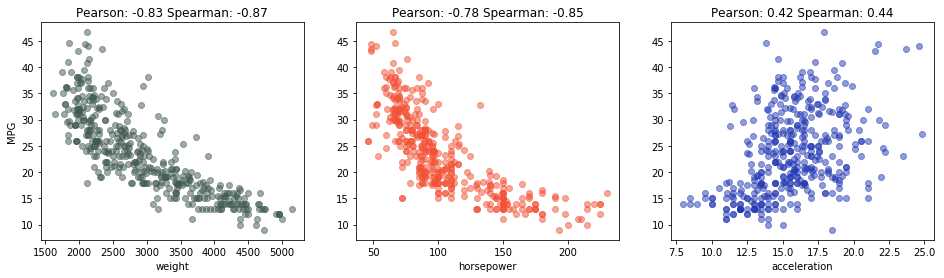

In [23]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 4]

# 一行三列的子图
fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['weight', 'horsepower', 'acceleration']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('MPG')
    i.scatter(mpg_data[cols[j]], mpg_data['mpg'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%mpg_data.corr().loc[cols[j]]['mpg'].round(2)+' Spearman: %s'%mpg_data.corr(method='spearman').loc[cols[j]]['mpg'].round(2))
    j+=1

plt.show()

## 相关性和因果性（Correlation and Causation）

在上述分析中，燃油效率与相关因素的关系可以根据机动车机械学原理从直觉上进行良好的解释。但是，在实际的数据分析中，很多关系并非如此直观。一个广为人知的事实是，**相关性并不代表因果性，因此，强的相关性需要更加严谨的考虑和分析。**

有个反面案例。德国的一个研究人员在一篇滑稽的论文中使用相关性的概念支持“婴儿是由鹳（stork）带来的”这样一个民间说法。下面的图中展示的是婴儿的出生数与鹳的数量的关系。
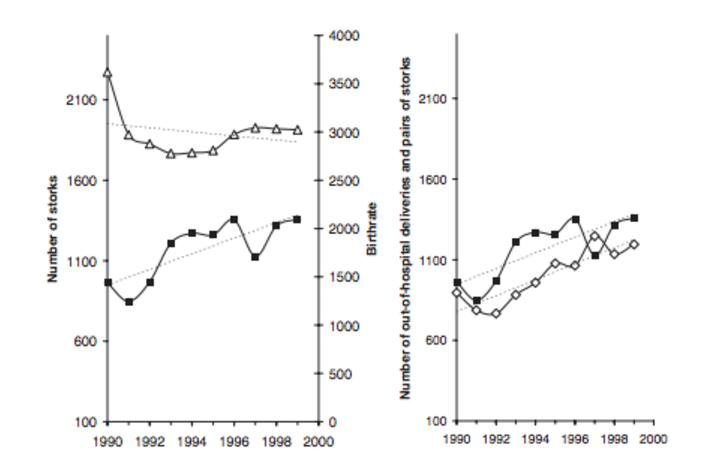

左图黑色方形标识的实线表示的是鹳的数量的增加趋势，白色三角形标识的实线表示的是医院出生的婴儿数量；在右图中，医院外出生的婴儿数量与鹳的数量的增加趋势一致。根据这些序列的相关性，作者认为医院外出生的婴儿数量的增加趋势与鹳的增加、医院内出生婴儿的数量的减少趋势同时出现，这证明这德国的越来越多的婴儿时由鹳带来的。

这虽然是个反面的例子，但它证明了重要的一点，因为偶然因素，在很多变量间都可以发现**伪相关关系**的存在。

另外，高相关性也可能因为一些未观测到的变量展现出因果关系。例如，一个城市中食品商店的数量和冰淇淋奶油厂的数量非常相关。然而，这里存在一个隐藏的变量，城市的人口数量。
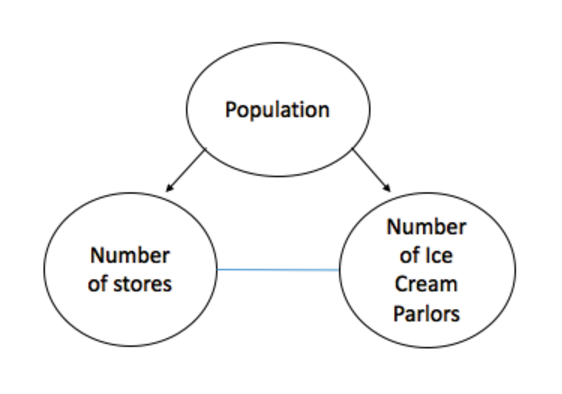

这个例子告诉我们，相关性只是数据的一个统计概要信息，远不能完整地解释数据的全部。

此外，还有其它相关性指标，如phi coefficient，可用于表示两个二元变量(dichotomous variable)的关联性度量。

##  练习

编程练习

使用pandas读取data.csv，自己实现相关系数地计算方法（选择皮尔逊，斯皮尔曼，肯德尔中的一个实现），计算x和sin，tanh，possion三个变量间的相关系数。

$$\rho_{X,Y}=\frac{\sum(X_i-\overline X)(Y_i-\overline Y)}{\sqrt{\sum(X_i-\overline X)^2\sum(Y_i-\overline Y)^2}}$$

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1,20,20)
sin = np.sin(x)
tanh = np.tanh(x)
possion = np.exp(-x)
data = {'x':x,'sin':sin,'tanh':tanh,'possion':possion}
df = pd.DataFrame(data,index=(x.astype(np.int32)-1))

In [19]:
for index,row in df.iterrows():
    print(index,row['x'],row['sin'],row['tanh'],row['possion'])

0 1.0 0.8414709848078965 0.7615941559557649 0.36787944117144233
1 2.0 0.9092974268256817 0.9640275800758169 0.1353352832366127
2 3.0 0.1411200080598672 0.9950547536867305 0.049787068367863944
3 4.0 -0.7568024953079282 0.999329299739067 0.01831563888873418
4 5.0 -0.9589242746631385 0.9999092042625951 0.006737946999085467
5 6.0 -0.27941549819892586 0.9999877116507956 0.0024787521766663585
6 7.0 0.6569865987187891 0.9999983369439447 0.0009118819655545162
7 8.0 0.9893582466233818 0.9999997749296758 0.00033546262790251185
8 9.0 0.4121184852417566 0.999999969540041 0.00012340980408667956
9 10.0 -0.5440211108893698 0.9999999958776927 4.5399929762484854e-05
10 11.0 -0.9999902065507035 0.9999999994421064 1.670170079024566e-05
11 12.0 -0.5365729180004349 0.9999999999244973 6.14421235332821e-06
12 13.0 0.4201670368266409 0.9999999999897818 2.2603294069810542e-06
13 14.0 0.9906073556948704 0.9999999999986171 8.315287191035679e-07
14 15.0 0.6502878401571168 0.9999999999998128 3.059023205018258e-07


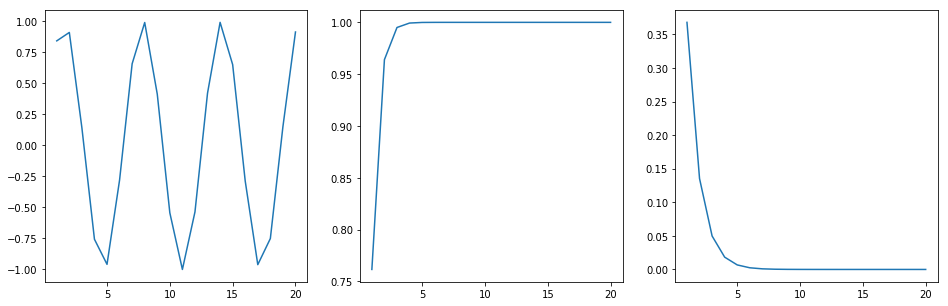

In [20]:
fig,axes=plt.subplots(1,3,figsize=(16,5))
axes[0].plot(x,sin)
axes[1].plot(x,tanh)
axes[2].plot(x,possion)
plt.show()

In [21]:
df.to_csv('data.csv')

In [199]:
import pandas as pd
import math

df = pd.read_csv('data.csv')
df
print(df["tanh"][7] == df["tanh"][8])

False


### 皮尔逊算法实现

In [200]:
def pearson(x,y):
    x_ = x.mean()
    y_ = y.mean()
    x_list = x.tolist()
    y_list = y.tolist()
    x_d = list(map(lambda x: x-x_, x_list))
    y_d = list(map(lambda y: y-y_, y_list))
    xy_d_m = list(map(lambda x,y:x*y, x_d,y_d))
    xy_d_m_sum = sum(xy_d_m)
    #print(xy_d_m_sum)
    x_d_2 = list(map(lambda x:x**2, x_d))
    y_d_2 = list(map(lambda y:y**2, y_d))
    x_d_2_sum = sum(x_d_2)
    y_d_2_sum = sum(y_d_2)
    corr = xy_d_m_sum/math.sqrt(x_d_2_sum*y_d_2_sum)
    return corr

In [201]:
corr_1 = pearson(df['x'],df['sin'])
print(corr_1)
corr_2 = pearson(df['x'],df['tanh'])
print(corr_2)
corr_3 = pearson(df['x'],df['possion'])
print(corr_3)

-0.09483720038777001
0.43504428263154327
-0.538700567408232


#### 利用相关包验证是否正确

In [202]:
from scipy.stats import pearsonr,spearmanr

corr_1, p_value_1 = pearsonr(df['x'],df['sin'])
print(corr_1)
corr_2, p_value_2 = pearsonr(df['x'],df['tanh'])
print(corr_2)
corr_3, p_value_3 = pearsonr(df['x'],df['possion'])
print(corr_3)
print("#######################################")
scoef_1, sp_1 = spearmanr(df['x'],df['sin'])
print(scoef_1)
scoef_2, sp_2 = spearmanr(df['x'],df['tanh'])
print(scoef_2)
scoef_3, sp_3 = spearmanr(df['x'],df['possion'])
print(scoef_3)

-0.09483720038777001
0.4350442826315433
-0.5387005674082321
#######################################
-0.060150375939849614
0.9996239894584121
-1.0


### 斯皮尔曼相关系数算法实现

In [203]:
def bubble_sort(num):
    """
    如果冒泡排序中的一次排序没有发生交换，则说明列表已经有序，可以直接结束算法
    :param num:
    :return:
    """
    for i in range(len(num) - 1):
        exchange = False
        #print(num)
        for j in range(len(num) - 1 - i):
            if num[j] > num[j + 1]:
                num[j], num[j + 1] = num[j + 1], num[j]
                exchange = True
        if not exchange:
            return num
    return num

In [209]:
def paixu(ser):
    x = list(ser)
    x_paixu = bubble_sort(x)
    paixu_dict = {}
    for i in range(len(x_paixu)):
        paixu_dict[i+1] = x_paixu[i]
    #print(paixu_dict)
    key_list = list(paixu_dict.keys())
    
    # 找出相同数字的位置
    value_list = list(paixu_dict.values())
    #print(value_list)
    flag = []
    for i in range(len(value_list)-1):
        for j in range(len(value_list) - i-1):
            if value_list[j] == value_list[j+1]:
                #print(j)
                #print(value_list[j],value_list[j+1])
                #print("*******")
                flag.append(j)
    #print(flag)            
    
    # 数字相同的两位置求平均数
    if len(flag) != 0:
        for i in range(len(flag)):
            #print(flag[i])
            key_list[flag[i]] ,key_list[flag[i]+1] = (key_list[flag[i]]+key_list[flag[i]+1])/2,(key_list[flag[i]]+key_list[flag[i]+1])/2
            #print(key_list[flag[i]],key_list[flag[i]+1])
    
    #print(key_list)
    # 与原来的序列进行匹配，将原数据替换成顺序数
    flag_2 = []
    shunxu_list = []
    yuan_x = list(ser)  #经过排序算法原序列x已经改变，需重新获取
    #print("yuanxilie")
    #print(yuan_x)
    for i in range(len(yuan_x)):
        for j in range(len(value_list)):
            if yuan_x[i] == value_list[j]:
                #print(yuan_x[i],value_list[j])
                #print(i,j)
                #print("@@@@@@@@@@@@@@@@@@@@")
                flag_2.append(j)
                break
    for i in range(len(flag_2)):
        shunxu_list.append(key_list[flag_2[i]])
    #print(shunxu_list)    
    
    return shunxu_list
        
    

In [210]:
def mean_fun(x):
    sum = 0
    for i in range(len(x)):
        sum += x[i]
    x_ = sum/len(x)
    return x_

In [211]:
def pearson_2(x_list,y_list):
    x_ = mean_fun(x_list)
    #print(x_)
    y_ = mean_fun(y_list)
    x_d = list(map(lambda x: x-x_, x_list))
    y_d = list(map(lambda y: y-y_, y_list))
    xy_d_m = list(map(lambda x,y:x*y, x_d,y_d))
    xy_d_m_sum = sum(xy_d_m)
    #print(xy_d_m_sum)
    x_d_2 = list(map(lambda x:x**2, x_d))
    y_d_2 = list(map(lambda y:y**2, y_d))
    x_d_2_sum = sum(x_d_2)
    y_d_2_sum = sum(y_d_2)
    corr = xy_d_m_sum/math.sqrt(x_d_2_sum*y_d_2_sum)
    return corr

In [212]:
x_ = paixu(df['x'])
print(x_)
print("#######################################")
sin_ = paixu(df['sin'])
print(sin_)
print("#######################################")
tanh_ = paixu(df['tanh'])
print(tanh_)
print("#######################################")
possion_ = paixu(df['possion'])
print(possion_)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
#######################################
[16, 17, 10, 4, 3, 9, 15, 19, 12, 6, 1, 7, 13, 20, 14, 8, 2, 5, 11, 18]
#######################################
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19.5, 19.5]
#######################################
[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [213]:
scoef_1 = pearson_2(x_, sin_)
print(scoef_1)
scoef_2 = pearson_2(x_, tanh_)
print(scoef_2)
scoef_3 = pearson_2(x_, possion_)
print(scoef_3)

-0.06015037593984962
0.9996239894584122
-1.0
